In [146]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [147]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

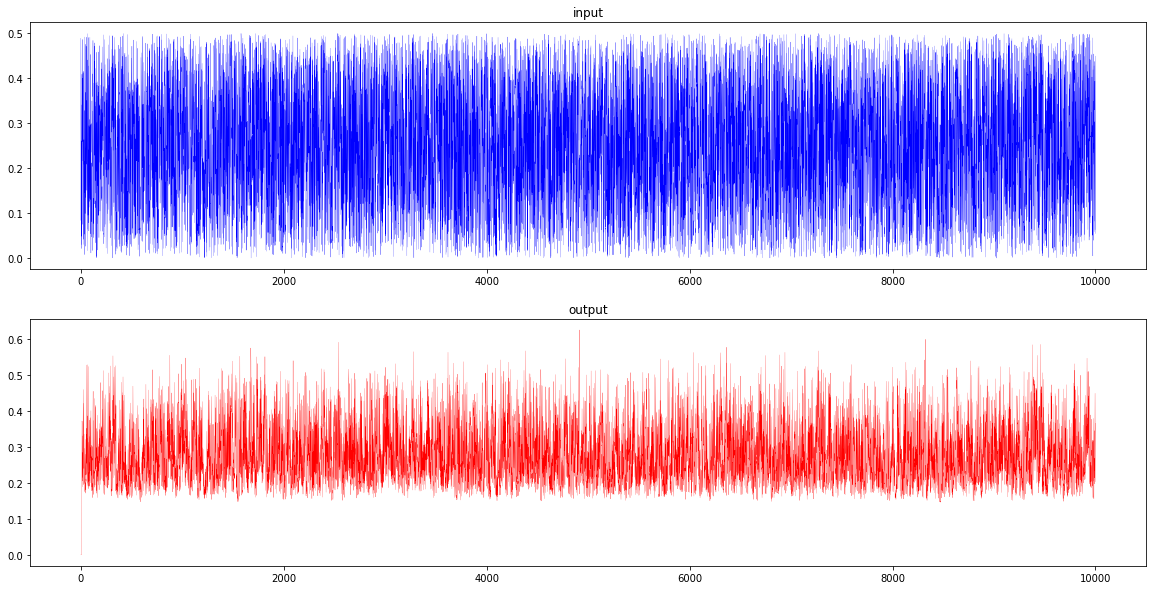

In [148]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000] #validation
x_test = x[5000:]

y_train = y[:4000]
y_valid = y[4000:5000]
y_test = y[5000:]

## TDNN

In [149]:
# Create a TDNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(units=20,input_shape=input_shape, activation='tanh'))
    #model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        #activation=activation[0]))
    model.add(Dense(units=30, activation='tanh'))
    model.add(Dense(units=1, activation='tanh'))
    learning_rate = 0.02
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [150]:
# Prepare the input X and target Y
def get_XY(x, y, time_steps):
    # Prepare Y
    Y = y[time_steps:]
    # Prepare X
    X = []
    rows_x = len(Y)
    j = 0
    for i in range(rows_x):
        X = np.append(X,x[j:j+time_steps])
        j = j + 1

    #X = np.reshape(X, (rows_x, time_steps))
    X =  np.reshape(X, (rows_x,1, time_steps)) 
    return X, Y 

 
time_steps = 10

trainX, trainY = get_XY(x_train, y_train, time_steps)
testX, testY = get_XY(x_test, y_test, time_steps)
validX, validY = get_XY(x_valid, y_valid, time_steps)

window = 10
input_shape = ( 1, window)

model = create_model(input_shape)
print(len(trainX))

model.summary()

3990
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1, 20)             220       
                                                                 
 dense_67 (Dense)            (None, 1, 30)             630       
                                                                 
 dense_68 (Dense)            (None, 1, 1)              31        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [151]:
print(trainX)

[[[0.08396357 0.48934032 0.35634724 ... 0.02121557 0.03572273 0.26082492]]

 [[0.48934032 0.35634724 0.25023581 ... 0.03572273 0.26082492 0.04836501]]

 [[0.35634724 0.25023581 0.23554419 ... 0.26082492 0.04836501 0.40907428]]

 ...

 [[0.2872668  0.45796251 0.2477162  ... 0.0337384  0.03448892 0.08339229]]

 [[0.45796251 0.2477162  0.08300619 ... 0.03448892 0.08339229 0.47371913]]

 [[0.2477162  0.08300619 0.16299883 ... 0.08339229 0.47371913 0.40554421]]]


In [152]:
print(trainX.shape)
trainX
print(trainY.shape)
trainY
print(len(trainX))


(3990, 1, 10)
(3990,)
3990


In [153]:
'''
X = np.reshape(x, (len(x),1))
Y = np.reshape(y, (len(y),1))

X_train = np.reshape(x_train, (len(x_train),1))
Y_train = np.reshape(y_train, (len(y_train),1))

X_valid = np.reshape(x_valid, (len(x_valid),1))
Y_valid = np.reshape(y_valid, (len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

window = 10
input_shape = (window,1)

model = create_model(input_shape)


model.summary()
'''


'\nX = np.reshape(x, (len(x),1))\nY = np.reshape(y, (len(y),1))\n\nX_train = np.reshape(x_train, (len(x_train),1))\nY_train = np.reshape(y_train, (len(y_train),1))\n\nX_valid = np.reshape(x_valid, (len(x_valid),1))\nY_valid = np.reshape(y_valid, (len(y_valid),1))\n\nprint(X_train.shape)\nprint(Y_train.shape)\n\nprint(X_valid.shape)\nprint(Y_valid.shape)\n\nwindow = 10\ninput_shape = (window,1)\n\nmodel = create_model(input_shape)\n\n\nmodel.summary()\n'

In [154]:
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_data = (validX, validY)).history

Epoch 1/50
3990/3990 - 6s - loss: 0.0026 - val_loss: 0.0021 - 6s/epoch - 2ms/step
Epoch 2/50
3990/3990 - 5s - loss: 0.0020 - val_loss: 0.0017 - 5s/epoch - 1ms/step
Epoch 3/50
3990/3990 - 6s - loss: 0.0019 - val_loss: 0.0016 - 6s/epoch - 1ms/step
Epoch 4/50
3990/3990 - 5s - loss: 0.0018 - val_loss: 0.0017 - 5s/epoch - 1ms/step
Epoch 5/50
3990/3990 - 5s - loss: 0.0014 - val_loss: 0.0016 - 5s/epoch - 1ms/step
Epoch 6/50
3990/3990 - 5s - loss: 9.4751e-04 - val_loss: 7.7051e-04 - 5s/epoch - 1ms/step
Epoch 7/50
3990/3990 - 5s - loss: 8.2507e-04 - val_loss: 6.2444e-04 - 5s/epoch - 1ms/step
Epoch 8/50
3990/3990 - 5s - loss: 6.6977e-04 - val_loss: 0.0011 - 5s/epoch - 1ms/step
Epoch 9/50
3990/3990 - 5s - loss: 5.8055e-04 - val_loss: 4.8435e-04 - 5s/epoch - 1ms/step
Epoch 10/50
3990/3990 - 5s - loss: 5.4563e-04 - val_loss: 5.8365e-04 - 5s/epoch - 1ms/step
Epoch 11/50
3990/3990 - 5s - loss: 5.3045e-04 - val_loss: 6.8563e-04 - 5s/epoch - 1ms/step
Epoch 12/50
3990/3990 - 6s - loss: 5.2046e-04 - val_

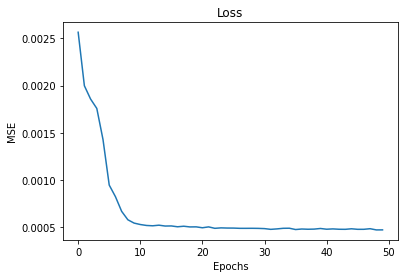

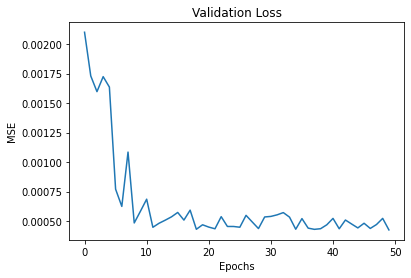

In [155]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

In [156]:
#print(np.reshape(trainX[1], (10 ,1)))

#model.predict(np.reshape(trainX[1], (10 ,1)))


[[0.48934032]
 [0.35634724]
 [0.25023581]
 [0.23554419]
 [0.02980943]
 [0.34098595]
 [0.02121557]
 [0.03572273]
 [0.26082492]
 [0.04836501]]


ValueError: in user code:

    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_22' (type Sequential).
    
    Input 0 of layer "dense_66" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_22' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None


In [157]:
#print(len(trainY))


y = model.predict(trainX)
print(y.shape)
print(y)
print(y[:,0,0])

125/125 [==============================] - 0s 2ms/step
(3990, 1, 1)
[[[0.19006847]]

 [[0.22414269]]

 [[0.38051546]]

 ...

 [[0.19412065]]

 [[0.47247118]]

 [[0.3478346 ]]]
[0.19006847 0.22414269 0.38051546 ... 0.19412065 0.47247118 0.3478346 ]


31/31 [==============================] - 0s 2ms/step - loss: 0.0137


0.013699250295758247

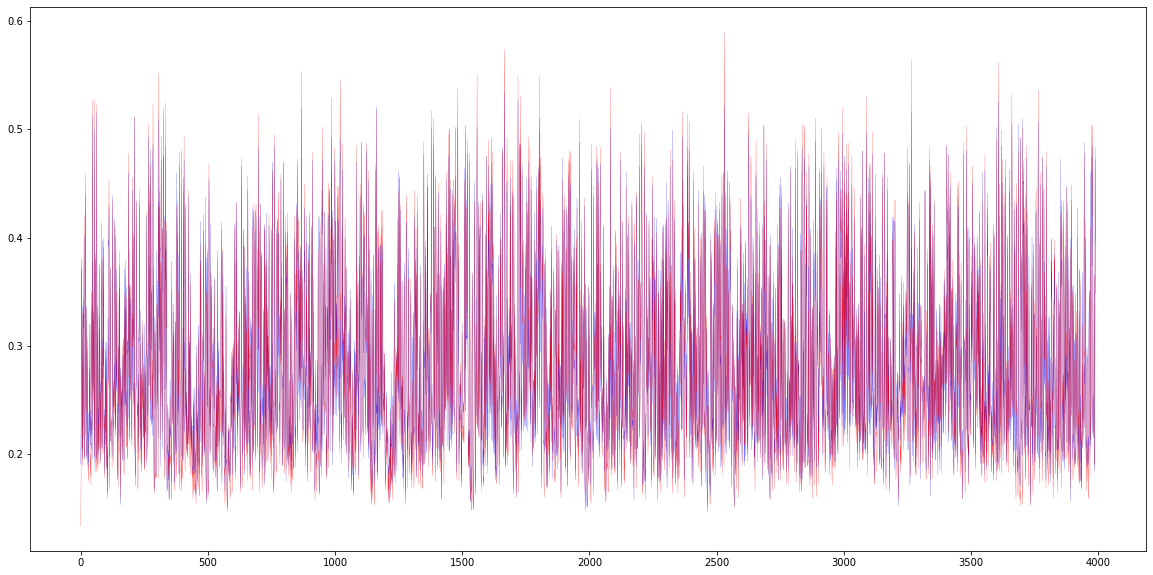

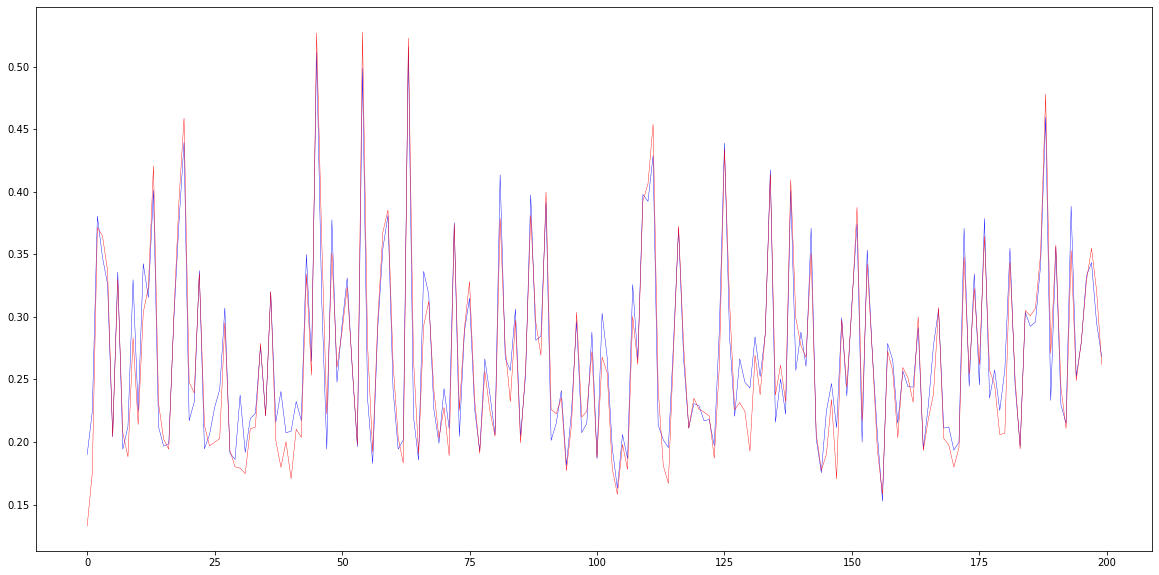

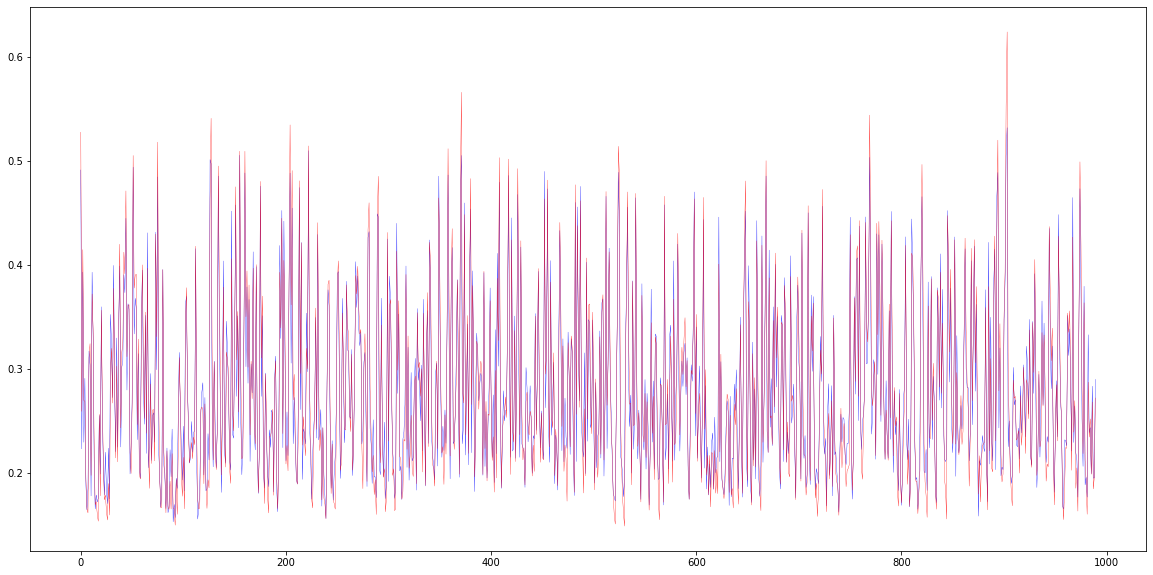

In [175]:
y = model.predict(trainX)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,trainY.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(trainX, trainY)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],trainY.ravel()[:200], color = 'r', linewidth= 0.4)

y = model.predict(validX)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,validY.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(validX, validY)


In [ ]:
print(model.predict([trainX]))

125/125 [==============================] - 0s 2ms/step
[[[0.2918557 ]
  [0.2691097 ]
  [0.27676603]
  ...
  [0.2950416 ]
  [0.2943186 ]
  [0.28221822]]

 [[0.2691097 ]
  [0.27676603]
  [0.28281534]
  ...
  [0.2943186 ]
  [0.28221822]
  [0.2936817 ]]

 [[0.27676603]
  [0.28281534]
  [0.28364062]
  ...
  [0.28221822]
  [0.2936817 ]
  [0.27372858]]

 ...

 [[0.28071952]
  [0.2709119 ]
  [0.28295714]
  ...
  [0.294418  ]
  [0.29438043]
  [0.29188535]]

 [[0.2709119 ]
  [0.28295714]
  [0.29190534]
  ...
  [0.29438043]
  [0.29188535]
  [0.27000618]]

 [[0.28295714]
  [0.29190534]
  [0.2876495 ]
  ...
  [0.29188535]
  [0.27000618]
  [0.27393207]]]


In [ ]:
print(y)
len(y)

[[[0.2918557 ]
  [0.2691097 ]
  [0.27676603]
  ...
  [0.2950416 ]
  [0.2943186 ]
  [0.28221822]]

 [[0.2691097 ]
  [0.27676603]
  [0.28281534]
  ...
  [0.2943186 ]
  [0.28221822]
  [0.2936817 ]]

 [[0.27676603]
  [0.28281534]
  [0.28364062]
  ...
  [0.28221822]
  [0.2936817 ]
  [0.27372858]]

 ...

 [[0.28071952]
  [0.2709119 ]
  [0.28295714]
  ...
  [0.294418  ]
  [0.29438043]
  [0.29188535]]

 [[0.2709119 ]
  [0.28295714]
  [0.29190534]
  ...
  [0.29438043]
  [0.29188535]
  [0.27000618]]

 [[0.28295714]
  [0.29190534]
  [0.2876495 ]
  ...
  [0.29188535]
  [0.27000618]
  [0.27393207]]]


3990

ValueError: x and y can be no greater than 2D, but have shapes (3990,) and (3990, 10, 1)

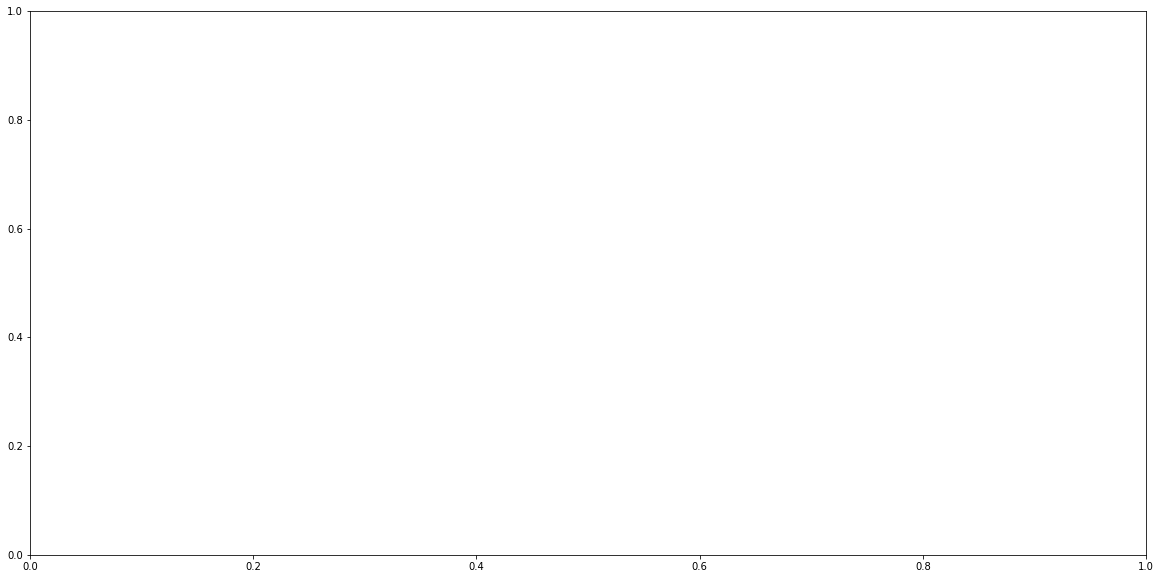

In [ ]:
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y, color = 'b', linewidth= 0.2)
plt.plot(t,trainY, color = 'r', linewidth= 0.2)
